<div style="text-align: center"><h1> LABORATORIO SPICE </h1></div><div style="text-align: right"> Lydia Logroño Ramas </div>


 # Objetivo del laboratorio
 El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos [SPICE](http://bwrcs.eecs.berkeley.edu/Classes/IcBook/SPICE) y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.

 # El estándar SPICE
 **SPICE** es una abreviabiación de *Simulation Program with Integrated Circtuit Emphasis*.
 Se trata básicamente de un método estándar para describir circuitos usando texto plano en lugar de una representación gráfica (o *esquemática*). A esta descripción en texto se la llama también **netlist** y básicamente se corresponde con la *lista* de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión.
 
 Los ficheros netlist pueden tener extensiones `.cir`, `.net`, `.ckt`, ó `.sp` y es muy común encontrárselos con cualquiera de estas.

 Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta *open source* y regidos por distintas comunidades de usuarios y programadores.

> **Pregunta: Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente). Aquí tienes un ejemplo del que puedes partir y seguir completando:**

| Intérprete | Licencia  | Versión actual         | Fabricante                                 | Características  |
| :--------- | :-------: |:---------------------: | :----------------------------------------: | ---------------- |
| Ahkab      | GPL       | versión 0.18           | Giuseppe Venturini                         | Basado en Python |
| LTSpice    | Freeware  | versión LTspice XVII   | Linear Technology and Analog Devices       | Basado en Spice  |
| PSpice     | De pago   | versión 17.2           | Cadence Design Systems                     | Basado en C      |
| NGspice    | Libre GNU | versión ngspice-33     | Open Source                                | Basado en C      |
| MacSpice   | Freeware  | versión  3.1.24        | Desarrollado por Charles D. H. Williams    | Programa para MAC|
| HSpice     | De pago   |                        | Cadence Design Systems                     | Basado en C      |


 > **Pregunta: ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software?**
 
 C es un lenguaje de programación de propósito general. C es apreciado por la eficiencia del código que produce y es el lenguaje de programación más popular para crear software de sistemas, aunque también se utiliza para crear aplicaciones. C es un programa que utiliza compiladores para traducir sus líneas de código sin necesidad de tener que interpretarlo.
 
 Spice como bien hemos comentado al principio es un programa utilizado para describir circuitos usando texto plano mediante un sencillo lenguaje. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Spice es un programa que necesita interpretar el código para poder ejecutarlo.
 
Por tanto, la principal diferencia que encuentro entre ambos programas es que C no necesita interpretar el código para ejecutar un programa y sin embargo Spice sí que necesita interpretar su código cada vez que desee ejecutar su programa. 
 
 
 > **¿Qué implementaciones reales (compiladores) del lenguaje C conoces?**
 
 Los informáticos, cuando hablamos de un compilador nos referimos a un tipo de traductor que transforma un programa entero de un lenguaje de programación  a otro.
 
 Los compiladores más conocidos en el caso del Lenguaje C son: MinGW (implementación de GCC para Windows), GCC (GNU Compiler Collection), Dev-C++ (es uno de los más utilizados para Windows en la actualidad), Code::Blocks (alternativa a Dev-C++ y desarrollada por el propio lenguaje C++)... 
 
 Los antiguos Turbo C y Turbo C++ que eran tanto compiladores como IDE para el sistema operativo MS-DOS fueron sustituidos por C++Builder, y Visual C++.
 
 ## Elementos de un netlist
 Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

 ## Comentarios

 La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un `*`. Ejemplo:
 
 ```spice
 Mi primer circuito
 * Otro comentario
 * más comentarios
 *
 ```

 ## Dispositivos básicos de un circuito
 Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo,
 tales como **resistencias**, **condensadores**, **bobinas**, **interruptores**, **hilos** y **fuentes de alimentación**.
 Para distinguir uno de otro, se reserva una letra característica: `V` para fuentes de alimentación, `R` para resistencias, `C` para condensadores y `L` para bobinas. También es posible usar estas letras en su versión en minúscula (`r`, `v`, `c`, `l`, etc.).
 Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

 ```
 * Una resistencia
 R1
 *  Otra resistencia
 R2
 * Fuente de alimentación
 V
 * Un condensador
 Cprincipal
 ```

 ## Conexiones
 A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles
 son los puntos de unión tanto a un lado como al otro del elemento.
 Así es como Spice sabe qué está conectado a qué: porque comparten un **punto**
 (o **nodo**, aunque este término se reserva sobretodo a uniones de más de dos elementos)
 que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una
 numeración secuencial: 0...n. **La enumeración de los puntos de unión es completamente
 a nuestro criterio**.

 ```
 * Una resistencia
 * entre cables 0 y 1
 R1 0 1
 ```

 **Sólo es necesario seguir un criterio**: en el caso de una
 fuente de alimentación, el nodo que pondremos primero será
 aquel que está más cerca del *borne* positivo. Ejemplo:

 ```spice
 * Para una fuente indicamos primeramente conexión a nodo positivo.
 v 2 3 type=vdc vdc=1
 ```
 
En el *caso de LTspice* no es necesario indicar los parámetros `type=vdc` y `vdc=X`, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

```spice
* Especificación de una fuente de alimentación de 10 V en corriente continua en el caso de LTspice
v 0 1 10
```

Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencia%20y%20pila%20con%20nodos.svg?sanitize=true)

 ## Unidades en SPICE

 Las unidades de las magnitudes características del circuito son siempre [unidades
 del Sistema Internacional](https://en.wikipedia.org/wiki/SI_electromagnetism_units) y no es necesario indicarlo explícitamente en el netlist.

 La forma de especificar múltiplos de estas cantidades es añadiendo una letra.
 Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son `k` para "kilo-," `m` para "mili?" y `u` para "micro?".

 > **Pregunta: Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.**
 
| Prefijo  | Símbolo   | Equivalencia numérica   | Equivalencia decimal              |
| -------- | --------- | ----------------------- | --------------------------------- | 
| yotta    | Y         | $$ { {10^{24}}}  $$     | 1 000 000 000 000 000 000 000 000 |
| zetta    | Z         | $$ { {10^{21}}}  $$     | 1 000 000 000 000 000 000 000     |
| exa      | E         | $$ { {10^{18}}}  $$     | 1 000 000 000 000 000 000         |
| peta     | P         | $$ { {10^{15}}}  $$     | 1 000 000 000 000 000             |
| tera     | T         | $$ { {10^{12}}}  $$     | 1 000 000 000 000                 |
| giga     | G         | $$ { {10^{9}}}   $$     | 1 000 000 000                     |
| mega     | M         | $$ { {10^{6}}}   $$     | 1 000 000                         |
| kilo     | k         | $$ { {10^{3}}}   $$     | 1 000                             |
| hecto    | h         | $$ { {10^{2}}}   $$     | 100                               |
| deca     | da        | $$ { {10^{1}}}   $$     | 10                                |
|          |           | $$ { {10^{0}}}   $$     | 1                                 |
| deci     | d         | $$ { {10^{-1}}}  $$     | 0.1                               |
| centi    | c         | $$ { {10^{-2}}}  $$     | 0.01                              |
| mili     | m         | $$ { {10^{-3}}}  $$     | 0.001                             |
| micro    | µ         | $$ { {10^{-6}}}  $$     | 0.000 001                         |
| nano     | n         | $$ { {10^{-9}}}  $$     | 0.000 000 001                     |
| pico     | p         | $$ { {10^{-12}}} $$     | 0.000 000 000 001                 |
| femto    | f         | $$ { {10^{-15}}} $$     | 0.000 000 000 000 001             |
| atto     | a         | $$ { {10^{-18}}} $$     | 0.000 000 000 000 000 001         |
| zepto    | z         | $$ { {10^{-21}}} $$     | 0.000 000 000 000 000 000 001     |
| yocto    | y         | $$ { {10^{-24}}} $$     | 0.000 000 000 000 000 000 000 001 |

 
 En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (`vdc`) o alterna (`ac`).

 ```
 * Una resistencia de 5 Ohmios
 R2 1 0 5
 * Una pila de 10 Voltios (continua)
 V1 1 0 type=vdc vdc=10
 * Una resistencia de 5 kΩ
 RX 2 4 5k
 ```

 > **Pregunta: ¿qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces? Responde aquí mismo en una celda de Markdown con una tabla.**
 
| Unidad    | Símbolo   | Magnitud                                    | 
| :-------  | :-------: | :-----------------------------------------: |  
| metro     | m         | longitud                                    | 
| kilogramo | kg        | masa                                        |
| segundo   | s         | timepo                                      | 
| kelvin    | k         | temperatura termodinámica                   | 
| amperio   | A         | corriente eléctrica                         | 
| mol       | mol       | cantidad de sustancia                       | 
| hercio    | Hz        | frecuencia                                  | 
| vatio     | W         | potencia y flujo radiante                   | 
| culombio  | C         | carga eléctrica                             |
| voltio    | V         | tensión eléctrica y diferencia de potencial |
| ohmio     | Ω         | resistencia eléctrica                       |
| tesla     | T         | campo mágnetico                             |
| newton    | N         | fuerza                                      |
| pascal    | Pa        | presión                                     |
| julio     | J         | energía (incluyendo calor)                  | 
| weber     | Wb        | flujo magnético                             | 
 

 ## Valores iniciales

 Aparecen justo al final de la definición del componente (`ic`). Suelen aplicarse principalmente con condensadores.

 ```
 * Una condensador inicialmente no cargado
 c 1 0 1u ic=0
 ```

 ## Fin del circuito

 El fin de la descripción de un netlist se especifica mediante el
 comando `.end`.

 ```spice
 * Mi primer circuito
 V 1 0 vdc=10 type=vdc
 R 1 0 5
 * Fin del circuito
 .end
 ```


 ## Comandos SPICE para circuitos en corriente continua

 Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué
 tipo de análisis queremos realizar sobre el mismo y cómo queremos presentar
 la salida de la simulación. Los comandos en Spice empiezan por un `.` y suelen
 escribirse justo al final del circuito, pero antes del comando `.end`.

 ```
  Mi primer circuito
 * Aquí van los componentes
 R 1 0 6k
 ...
 * Comandos
 .op
 ...
 * Fin del circuito
 .end
 ```

 > **Pregunta: Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta.** 
 
 En mi opinión, el lenguaje Spice encajaría como lenguaje específico de dominio, ya que como hemos comentado antes no es un lenguaje de programación de propósito general como lo es C, si no que su utilidad está muy definida ya que es un programa específico cuyo objetivo es simular circuitos electrónicos analógicos compuestos por resistencias, condensadores, diodos, transistores, etc.

 
 Veamos los principales comandos de simulación:

 - `.op` es el comando más sencillo que podemos emplear. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
 - `.dc` es uy parecido al comando `.op` pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B.
 En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:


 ```spice
 * Variamos el valor del voltaje
 * de la fuente "v" de 1 a 1000
 * en pasos de 5 voltios
 v 1 0 type=vdc vdc=10
 .dc v 1 start=1 stop=1000 step=20
 v2a 2 4 type=vdc vdc=9
 * Igual para v2a. Se ignora su voltaje de 9V
 .dc v2a start=0 stop=10 step=2
 ```

 - El comando `.tran` realiza un análisis en el tiempo de los parámetros del
 circuito. Si no se emplea la directiva `uic` (*use initial conditions*) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo `tfinal`.
 y en intervalos `tstep`. Si empleamos un varlor distinto para parámetro `uic`,
 entonces se hará uso de las condiciones iniciales definidas para cada componente
  (típicamente `ic=X` en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).


 ```
 * Hacemos avanzar el tiempo entre
 * tinicial y tfinal en pasos tstep
 .tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
 ```

 `X`, `Y` y `Z` tienen, evidentemente unidades de tiempo en el S.I. (segundos).

 > **Pregunta: El parámetro `uic` puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la [documentación de Ahkab](https://buildmedia.readthedocs.org/media/pdf/ahkab/latest/ahkab.pdf).**
 
 El comando `.tran` realiza un análisis en el tiempo de los parámetros del circuito desde tstart (que tiene valor predeterminado 0) hasta tstop.

Tstep este es el paso inicial. De forma predeterminada, el programa intentará ajustarlo para mantener la estimación inicial del tamaño del paso. Tstop es la duración de la simulación y tstart es el punto de partida que como he nombrado antes viene con un valor predeterminado 0.

El termino UIC se utiliza cuando tenemos condiciones iniciales especificadas en los condensadores e inductancias y queremos usarlas.

| Valores   | Significado                                                                                                                             |
| :-------: | :-------------------------------------------------------------------------------------------------------------------------------------: |
| UIC       | Usa las condiciones iniciales especificadas por el usuario. Se utiliza para especificar el estado del circuito en el momento t - tstart.| 
| uic=0     | Todos los voltajes y corrientes de nodo a través de distintas fuentes serán 0 en t - tstart .                                           |
| uic=1     | El estado en t - tstart será el último resultado de un análisis de OP.                                                                  | 
| uic=2     | El estado en t - tstart será el último resultado de un análisis OP donde se establecen los valores de corrientes a través de inductores                   y tensiones en condensadores especificados en su ic.                                                                                    | 
| uic=3     | Carga una condición inicial suministrada por un usuario. Esto requiere una directiva .ic en algún lugar de la netlist y los nombre de un                  .ic e ic_label deben coincidir.                                                                                                          |

 ## Intérprete SPICE que vamos a usar: Ahkab
 Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implmentación más en Python del estándar Spice.
 
 > **Pregunta: Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown.**
 
| Lenguajes   | Implementaciones                                                                                                                       |
|  ---------  | :------------------------------------------------------------------------------------------------------------------------------------: |
| JAVA        | OpenJDK (versión libre de GNU), HotSpot (máquina virtual Java desarrollada por Oracle Corporation), JNode (sistema operativo totalmente                   hecho en Java), Apache Harmony (implementación de código abierto de Java, desarrollado por la Apache Software Foundation)...           |
| JAVASCRIPT  | SpiderMonkey (intérprete de JavaScript empleado en el navegador Mozilla Firefox), Rhino (intérprete de JavaScript de código abierto),                     JavaScriptCore (framework desarrollado por Apple Inc. para proveer de un Intérprete de JavaScript a Mac OS X), V8 (motor de código                         abierto para JavaScript y WebAssembly, creado por Google)...                                                                           |
| PHP         | Motor Zend (motor de procesamiento para la interpretación y cifrado del código PHP), HHVM (HipHop Virtual Machine es una máquina virtual                   de código abierto), Parrot (máquina virtual basada en registros, que está siendo desarrollada en lenguaje C)...                        |
| PHYTON      | CPython (implementación oficial escrita en C), Jython (lenguaje de programación de alto nivel, dinámico y orientado a objetos basado en                   Python e implementado íntegramente en Java)...                                                                                         |
| C++         | C++ Builder (entorno de desarrollo rápido de aplicaciones en lenguaje C++ para Windows), GCC (GNU Compiler Collection es un conjunto de                   compiladores creados por GNU), Visual C++ ( entorno de desarrollo integrado para lenguajes de programación C, C++ y C++/CLI),                             Code::Blocks (entorno de desarrollo integrado de código abierto)...                                                                    |
 
 > **Pregunta: Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).**

|   AHKAB         |                                                                                                                                    |
| :-------------: | :--------------------------------------------------------------------------------------------------------------------------------  |
| creador         | Giuseppe Venturini                                                                                                                 |
| objetivos       | Implementación y simulación de circuitos electricos                                                                                |
| versiones       | 0.18                                                                                                                               |
| licencia        | Licencia GNU v2                                                                                                                    |
| características | Admite operaciones como la impresión de todas las matrices de ecuaciones, escrito en lenguaje de programación Python, es un software                       de código abierto, por lo que puedes modificarlo y trabajar en ello ...                                                            |





# Trabajo práctico
 Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.
 ## Instalación de bibliotecas necesarias
 Si estás utilizando Anaconda, asegúrate de tener su entorno activado:
 
 ```cmd
 C:\> conda activate base (en el caso de Windows)
 ```
 ó

 ```bash
 $ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)
 ```

En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando `conda` (visita la sección de [Environment Variables](https://superuser.com/questions/949560/how-do-i-set-system-environment-variables-in-windows-10) del [Panel de Control](https://www.digitalcitizen.life/8-ways-start-control-panel-windows-10)). Si has instalado Anaconda con [esta opción](https://docs.anaconda.com/_images/win-install-options.png) marcada, ya no tienes que preocuparte por ello. 

En el caso de usar Visual Studio Code, este puede encontrar automáticamente la distintas distribuciones de Python que tengamos instaladas y si abrimos un terminal, este se adaptará automáticamente al entorno Python que hayamos seleccionado. La configuración de Python en VS Code está bien explicada su [documentación](https://code.visualstudio.com/docs/python/python-tutorial).

![](https://raw.githubusercontent.com/microsoft/vscode-python/main/images/InterpreterSelectionZoom.gif)

Ahora ya puedes instalar Ahkab:

 ```
 (base) $ pip install ahkab
 ``` 

También puedes instalar Ahkab directamente desde este mismo notebook:

In [3]:
!pip install ahkab


 Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el [REPL](https://en.wikipedia.org/wiki/Read–eval–print_loop) como desde un entorno Jupyter (Jupyter, [Jupyterlab](http://jupyterlab.readthedocs.io/en/stable/), VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su [documentación oficial](https://nteract.io/kernels). 

Como vamos a pintar algunas gráficas, necesitamos instlar [matplotlib](https://matplotlib.org). Al igual que con Ahkab, esto lo podemos hacer directamente desde este mismo notebook. Si hemos usado Anaconda: 

In [4]:
!conda install -y -c conda-forge matplotlib

Solving environment: ...working... done

# All requested packages already installed.



In [5]:
import pylab as plt
import ahkab

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.


 > **Pregunta: ¿Qué es y para qué sirve PyLab?**
 
 PyLab que no es una librería sino un conglomerado de varias librerías entre las que se incluyen numpy, sympy, matplotlib, ipython...
 Con esta suite podemos usar al interprete de Python como si se tratase de MatLab  y hacer nuestros .py como si fueran scripts de MatLab.
 PyLab es un programa de código abierto, lo cual no se necesita pagar una licencia.

 ## Circuitos sencillos para trabjar con la ley de Ohm:

 La *mal llamada* ley de Ohm reza que el voltaje (la *energía por unidad de carga*) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad ($I$) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material ($R$) en el que está desplazándose dicha corriente. Matemáticamente:

 $$
 V = I\cdot R
 $$

 > **Pregunta: comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo    igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.**
 
   Para comprobar que la ecuación anterior está ajustada a nivel dimensional, primero escribiré las unidades de medida que equivalen a cada componente de    dicha función: 
 
   En primer lugar encontramos $V$ (Voltaje), cuyas unidades son las siguientes: 
 
  $$ 
  V = \frac{\mathrm{kg} \ \mathrm{m}^{2}}{\mathrm{A} \ \mathrm{s}^{3}}
  $$
 
  En segundo lugar encontramos $I$ (Intensidad), cuya unidad de medida son los Amperios (A).
 
  Y por último $R$ (Resistencia), cuyas unidades son las siguientes: 
 
  $$ 
  R = \frac{V}{I} = \frac{\mathrm{kg} \ \mathrm{m}^{2}}{\mathrm{A}^{2} \ \mathrm{s}^{3}}
  $$

  Si sustituimos V, I y R por sus unidades, nos queda la función de la siguiente manera:

  $$
  V = I\cdot R --> \frac{\mathrm{kg} \ \mathrm{m}^{2}}{\mathrm{A} \ \mathrm{s}^{3}} =  \mathrm{A} \ \frac{\mathrm{kg} \ \mathrm{m}^{2}}{\mathrm{A}^{2} \     \mathrm{s}^{3}}
  $$

  Simplificando la función nos queda la siguiente igualdad:

  $$
  \frac{\mathrm{kg} \ \mathrm{m}^{2}}{\mathrm{A} \ \mathrm{s}^{3}} = \frac{\mathrm{kg} \ \mathrm{m}^{2}}{\mathrm{A} \ \mathrm{s}^{3}}
  $$

  Confirmamos de esta manera que la ecuación está ajustada a nivel dimensional ya que en ambos lados de la igualdad quedan las mismas unidades.
 
 
Comencemos con el circuito más sencillo posible de todos:

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

 Vamos a escribir su contenido (componentes o *netlist*) en disco con el nombre `circuito sencillo.sp`. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los *comandos mágicos* de este entorno de programación literaria. En concreto vamos a utilizar `%%writefile` que guarda los contenidos de una celda como un fichero. 

In [6]:
%%writefile "circuito sencillo.sp"
* Este es un circuito sencillo
r1 1 0 10
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end

Overwriting circuito sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [7]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')

 Separamos la información del netlist (componentes) de los análisis (uno de tipo `op` y otro de tipo `dc`):

In [8]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)


[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


> **Pregunta: ¿qué tipo de estructura de Python es `lista_de_análisis`?**



 Las simulaciones que implican listas de datos (`.dc`, `.tran`, etc.) necesitan de un fichero temporal (`outfile`)
 donde almacenar los resultados. Para ello tenemos que definir la propiedad `outfile`.

In [9]:
lista_de_análisis[1]['outfile'] = "simulación dc.tsv"


 > **Pregunta: escribe el código Python necesario para identificar qué análisis de `lista_de_análisis`
 son de tipo `dc` ó `tran` y sólo añadir la propiedad `outfile` en estos casos.
Aquí tenéis un post de Stackoverflow con algo de [ayuda](https://stackoverflow.com/questions/49194107/how-to-find-index-of-a-dictionary-key-value-within-a-list-python).
 Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo `dc`. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo `tran` y/o `dc`.**

In [10]:
#Suponiendo que como máximo habrá un análisis de tipo tran y/o dc, podemos hacer la asignación combinando las dos sentencias anteriores.

fichero = [i for i, d in enumerate(lista_de_análisis) if "dc" in d.values()][0]
lista_de_análisis[fichero]['outfile'] = "simulación dc.tsv"

In [11]:
#Lo primero que haremos será crear una lista con un número de archivos 
print("Creamos una lista de 6 ficheros")
fichero=[]
for i in range(6):
    fichero.append({'fichero':i})

# Añadimos el tipo 'type' a 2 de los fichero, 1 con valor 'dc' y otra con valor 'tran'
fichero[2]['type'] = 'dc'
fichero[4]['type'] = 'tran'

#En el siguiente código vamos a imprimir por pantalla como quedaría la lista habiendo añadido anteriormente los tipos de analisis 'dc' y 'tran'.
print("\nLista con los tipos 'dc' y 'tran':")
for i in range(6):
    print(fichero[i])

#Ahora vamos a comprobar que el código nos imprime bien las filas de los valores por los que le preguntamos
print("\nImprimir fila del tipo \"dc\"")
print("[i for i, d in enumerate(fichero) if \"dc\" in d.values()][0]")
print([i for i, d in enumerate(fichero) if "dc" in d.values()][0])

print("\nImprimir fila del tipo \"tran\"")
print("[i for i, d in enumerate(fichero) if \"tran\" in d.values()][0]")
print([i for i, d in enumerate(fichero) if "tran" in d.values()][0])

#Ahora añadiremos a la lista la lista_de_analisis
print("\nCombinando las dos sentancias principales:")
print("fichero[ [i for i, d in enumerate(fichero) if \"dc\" in d.values()][0] ]['outfile'] = \"simulación_dc.tsv\"")
fichero[ [i for i, d in enumerate(fichero) if "dc" in d.values()][0] ]['outfile'] = "simulación_dc.tsv"
print("fichero[ [i for i, d in enumerate(fichero) if \"tran\" in d.values()][0] ]['outfile'] = \"simulación_tran.tsv\"")
fichero[ [i for i, d in enumerate(fichero) if "tran" in d.values()][0] ]['outfile'] = "simulación_tran.tsv"

# ¿Cómo queda la lista?
print("\nEste es el resultado final de la lista:")
for i in range(6):
    print(fichero[i])

Creamos una lista de 6 ficheros

Lista con los tipos 'dc' y 'tran':
{'fichero': 0}
{'fichero': 1}
{'fichero': 2, 'type': 'dc'}
{'fichero': 3}
{'fichero': 4, 'type': 'tran'}
{'fichero': 5}

Imprimir fila del tipo "dc"
[i for i, d in enumerate(fichero) if "dc" in d.values()][0]
2

Imprimir fila del tipo "tran"
[i for i, d in enumerate(fichero) if "tran" in d.values()][0]
4

Combinando las dos sentancias principales:
fichero[ [i for i, d in enumerate(fichero) if "dc" in d.values()][0] ]['outfile'] = "simulación_dc.tsv"
fichero[ [i for i, d in enumerate(fichero) if "tran" in d.values()][0] ]['outfile'] = "simulación_tran.tsv"

Este es el resultado final de la lista:
{'fichero': 0}
{'fichero': 1}
{'fichero': 2, 'type': 'dc', 'outfile': 'simulación_dc.tsv'}
{'fichero': 3}
{'fichero': 4, 'type': 'tran', 'outfile': 'simulación_tran.tsv'}
{'fichero': 5}


Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método `.run` de Ahkab: 

In [12]:
fichero = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done


### Resultados de la simulación `.dc`
Imprimimos información sobre la simulación de tipo `.dc`:

In [13]:
print(fichero['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2021-01-06 10:12:00, data file simulación dc.tsv>


 Veamos qué variables podemos dibujar para el caso del análisis `dc`.

In [14]:
print(fichero['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (`V1`) con respecto a la intensidad del circuito (`I(V1)`).

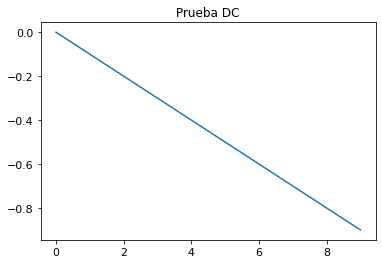

In [15]:
fig = plt.figure()
plt.title("Prueba DC")
plt.plot(fichero['dc']['V1'], fichero['dc']['I(V1)'], label="Voltaje (V1)")

> **Pregunta:** comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede *viajar* solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. Algo de [ayuda](https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html). ¿Qué biblioteca estamos usando para graficar? Una [pista](https://matplotlib.org).

La gráfica que nos encontramos nos muestra los valores del voltaje (V) en ele eje X, frente a la intensidad (I) en el eje Y.

Con la gráfica observamos que conforme aumenta el voltaje, aumenta con el la intensidad. 

Tambíen observamos que la resistencia (R) va a ser de 10Ω :

$$
 V = I\cdot R
$$

Si cogemos los valores de la gráfica (en valor absoluto) y hacemos los cálculos:

$$
  4 = 0.4\cdot R 
$$ 

Despejamos R y calculamos:

$$  
 R = \frac{4V}{0.4A} = 10Ω
$$

La gráfica quedaría de la siguiente manera utilzando Matplotlib:
  

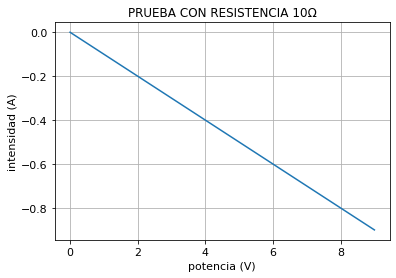

In [16]:
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *


plt.plot(fichero['dc']['V1'], fichero['dc']['I(V1)'], label="Voltaje (V1)")
xlabel('potencia (V)')
ylabel('intensidad (A)')
title('PRUEBA CON RESISTENCIA 10Ω')
plt.grid()
show()



 ### Resultados de la simulación `.op` 
 El método `.results` nos devuelve un diccionario con los resultados de la simulación.

In [17]:
print(fichero['op'].results)

{V1: -9.0, I(V1): -0.9}


 > **Pregunta: justifica el sencillo resultado anterior (análisis `op`). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).**
 
 El análisis 'op' nos determina el voltaje (9V) y la intensidad (0.9A). 
 
 Según la ley de Ohm:
 
$$
 V = I\cdot R
$$
 
Por tanto vamos a justificar que los valores que nos devuelve el añalisis op son los correctos.
Tomando R con valor de 100Ω comprobamos que el resultado es  el mismo que el del analisis op.

$$ 
 I = \frac{V}{R} = \frac{9V}{10Ω} = 0.9A
$$

Ahora comprobaremos el ejercicio con Sympy:

In [18]:
from sympy import solve, symbols, Eq

from sympy. physics.units import convert_to

from sympy. physics.units import ampere

from sympy. physics.units import volt

from sympy. physics.units import ohm

R = 10 * ohm

V = 9 * volt

I = symbols("intensidad")

eq_ohm = Eq(I, V/R)

solucion_I = solve(eq_ohm, I)

I = solucion_I

I = convert_to(solucion_I[0], [ampere]).n(2)

print("\nla intensidad en amperios es:")
I


la intensidad en amperios es:


0.9*ampere

## Resolución del mismo circuito pero con LTspice
¿Cómo? ¿Es esto posible? ¿Desde Jupyter? Sí!!! Pero primero, por comodidad, deberíamos crear un alias del comando que apunte a nuestro ejecutable. Además, con un poco de inteligencia, podemos adelantarnos al hecho de si estamos en Windows o macOS:

In [19]:
import platform
%alias lts /Applications/LTspice.app/Contents/MacOS/LTspice -ascii -b
if platform.system() == "Windows":
    %alias lts "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -ascii -b

**Pregunta: ¿Qué significan las opciones `-b` y `-ascii`? Algo de ayuda [aquí](http://ltwiki.org/LTspiceHelp/LTspiceHelp/Command_Line_Switches.htm).**

ASCII es un sistema de codificación de caracteres alfanuméricos. El parámetro -ascii es el encargado de hacer correr el programa con los archivos en dicho código (ascii).

El parametro -b lee el código y los datos obtenidos se guardan en los archivos .raw. 

También tenemos que cambiar ligeramente la sintaxis. Ejecuta esta línea para que se escriba el fichero siguiente. Para LTspice, vamos a reservar la extensión `.net`:

In [20]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 10
v1 0 1 9
.op
* Comentamos el análisis .dc para centrarnos primero en el .op
* .dc v1 1 10 
.end

Overwriting circuito sencillo.net


Ejecutamos LTspice con el circuito (de la misma manera que antes habíamos hecho con Ahkab).

In [21]:
lts "circuito sencillo.net"

Cuando ejecutamos el comando anterior lo que hacemos es llamar internamente al programa LTSpice en modo línea de comandos. 

Este comando nos devuelve el resultado guardado en un fichero llamado .log 

Veamos que sucede cuando ejecutamos dicho fichero:



In [23]:
%pycat circuito sencillo.log

Ahora repitamos lo mismo para el análisis `.dc`:

In [24]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 10
v1 0 1 9
* Ahora obviamos el análisis .op
* .op
.dc v1 1 10 
.end


Overwriting circuito sencillo.net


In [25]:
lts "circuito sencillo.net"

Al ejecutar esta simulación, se genera un fichero `.raw` con los resultados. Es muy parecido al `outfile` que hemos empleado antes con Ahkab. Para leer este fichero, tenemos que usar el paquete [ltspice de Python](https://github.com/DongHoonPark/ltspice_pytool), el cual podéis instalar directamente desde Jupyter:

In [26]:
!pip install ltspice

Ahora ya podemos leer este fichero `.raw` y pintar una recta de voltaje muy parecida a la que obtuvimos anteriormente con Ahkab:

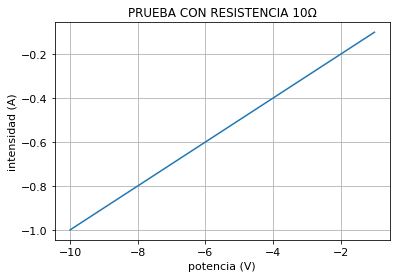

In [27]:
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

import ltspice

l = ltspice.Ltspice("circuito sencillo.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
# Podemos pintar la corrente en función del tiempo
# plt.plot(tiempo, corriente)
# O el voltaje
xlabel('potencia (V)')
ylabel('intensidad (A)')
title('PRUEBA CON RESISTENCIA 10Ω')
plt.grid()
plt.plot(voltaje, corriente)


** En resumen: ** hemos usado dos *compiladores* Spice distintos para hacer el mismo ejercicio. De igual manera podríamos haber usado [Ngspice](http://ngspice.sourceforge.net) u otro. De hecho, podíamos haber usado Ahkab en modo comando. Si tenemos correctamente instalado este framework, en princpio podemos invocarlo [directamente desde línea de comandos](https://ahkab.readthedocs.io/en/latest/help/Command-Line-Help.html):

In [28]:
!ahkab "circuito sencillo.sp"

2021-01-06 10:16:25
ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: circuito sencillo.sp
Title: * este es un circuito sencillo
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value        Error    %
----------  -------  -------  -----------  ---
V1          V           -9    9.00002e-12    0
I(V1)       A           -0.9  0              0

ELEMENTS OP INFORMATION:



W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.
Traceback (most recent call last):
  File "c:\users\huawei\scoop\apps\miniconda3\current\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\huawei\scoop\apps\miniconda3\current\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Huawei\scoop\apps\miniconda3\current\Scripts\ahkab.exe\__main__.py", line 7, in <module>
  File "c:\users\huawei\scoop\apps\miniconda3\current\lib\site-packages\ahkab\__main__.py", line 156, in _cli
    outfile=cli_options.outfile, verbose=verbose)
  File "c:\users\huawei\scoop\apps\miniconda3\current\lib\site-packages\ahkab\ahkab.py", line 953, in main
    results.update(run(circ, [an]))
  File "c:\users\huawei\scoop\apps\miniconda3\current\lib\site-packages\ahkab\ahkab.py", line 714, in run
    r = analysis[an_type](circ, **an_item)
  File "c:\users\huawei\scoop\apps\minicond

 ## Análisis de circuito con resistencias en serie

Vamos a resolver (en punto de operación) el siguiente circuito.

Formado por una pila de 9V y 3 resistencias; R1(3kΩ), R2(10kΩ) y R3(5kΩ):

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la *palabra mágica* [`%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). Más info [aquí](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). 

In [29]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie.net


In [30]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimos los resultados del análisis `.op`:

In [31]:
print(resultados['op'])

OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie.net).
Run on 2021-01-06 10:16:27, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Los cantidades `V1`, `V2` y `V3` hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (`1`, `2`, etc.). Por ejemplo, podemos calcular el *potencial consumido* por la resistencia `R1` y verás que coincide con el del punto `V2` devuelto por Ahkab.


**Ejercicio: compruébalo tú mismo y refléjalo por escrito.**

Para que el resultado no nos de problemas lo primero que haremos será renombrar el orden en el que se han definido las resistencias; empezando por nombrar el born 0 (el que se encuentra debajo de la pila), de tal manera que el circuito quedaría renombrado de la siguiente manera:

In [ ]:
Spice
 v1 1 0 type=vdc vdc=9
 R1 1 2 3k
 R2 2 3 10k
 R3 3 0 5k

In [32]:
%%writefile "resistencias en serie II.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 1 2 3k
R2 2 3 10k
R3 3 0 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie II.net


In [33]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie II.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [34]:
print(resultados['op'])

OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie II.net).
Run on 2021-01-06 10:16:54, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         7.5     -7.5e-12    0
V3          V         2.5     -2.5e-12    0
I(V1)       A        -0.0005   0          0


Una vez hemos vuelto a nombrar el circuito, vamos a comprobar que el potencial consumido por la resistencia R1 coincide con la diferencia de potencial V2 devuelto por Ahkab.

En el circuito encontramos **R1(3kΩ), R2(10kΩ) y R3(5kΩ)**.

Estas resistencias las podemos trabajar en serie de tal manera que el circuito estuviese compuesto de 2 resistencias en vez de 3. La primera resistencia sería **R1 (3kΩ)** y la otra resistencia sería **R2 + R3 (10kΩ + 5kΩ = 15kΩ)**. 

La carga total sería la siguiente: 

**R1 + R2 + R3 = 3kΩ + 10kΩ + 5kΩ = 18kΩ**

Primero vamos a comprobar que la corriente corresponde a la que nos devuelve Ahkab. 

Para ello vamos a calcularla manualmente mediante la Ley de Ohm:

$$
 V = I\cdot R
$$

$$ 
 I = \frac{V}{R} = \frac{9V}{18kΩ} = 0.0005A
$$

Como observamos la intensidad corresponde con los 0.0005A que nos devuelve Ahkab para I(V1).

Como las resistencias están en serie, la intensidad será la misma para todo el circuito y por ello podemos calcular la caída de potencial en cada resistencia:

$$
 V1 = I\cdot R1 = 0.0005A . 3000Ω = 1.5V
$$

$$
 V2 = I\cdot R2 = 0.0005A . 10000Ω = 5V
$$

$$
 V3 = I\cdot R3 = 0.0005A . 5000Ω = 2.5V
$$

Si observamos:   
$$
 V1 + V2 + V3 = 1.5V + 5V + 2.5V = 9V
$$

Y además la suma de las resistencias 

$$
R2 + R3 = 5V + 2.5V = 7.5V
$$

Queda comprobado que coinciden los resultados ya que V2 es la diferencia de potencial entre la conexión de la resistencia R1 con la resistencia R2 y toma a tierra. 

Cargamos primero todo lo relacionado con Sympy:

In [35]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to

In [36]:
r1 = 3E3*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v2 = convert_to(intensidad_ahkab*r1, [volts])
v2

-1.5*volt

 > **Pregunta: reproduce el resto de los valores anteriores de manera *manual* mediante Sympy (es decir, aplicando la ley de Ohm, pero con un *toque computacional*). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (`r_total`). Faltarían el resto de resultados y convertirlos a unidades más *vistosas* (mediante la orden `convert_to` y `.n()`).**

In [36]:
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
v1 = 9*volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)

print("\nLa intensidad es:")
convert_to(solucion_para_intensidad[0], [amperes]).n(2)


La intensidad es:


0.0005*ampere

Para realizar este ejercicio utilizaremos el primer analisis .op que nos había devuelto Ahkab antes de renombrar nosotros el circuito.

In [37]:
from sympy.physics.units import kilo
from sympy.physics.units import ohm
from sympy import solve, symbols
r1 = 3E3*ohms
r2 = 10E3*ohms
r3 = 5E3*ohms
r_total = r1 + r2 + r3

print("\nLa resistencia total es:")
r_total


La resistencia total es:


18000.0*ohm

In [38]:
voltaje = symbols('v')
ley_ohm = Eq(voltaje, solucion_para_intensidad[0]*r1)
solucion_voltaje_R1 = solve(ley_ohm, voltaje)

print("\nPotencial V1 es:")
convert_to(solucion_voltaje_R1[0], [volts]).n(2)


Potencial V1 es:


1.5*volt

In [39]:
voltaje = symbols('v')
ley_ohm = Eq(voltaje, solucion_para_intensidad[0]*r2)
solucion_voltaje_R2 = solve(ley_ohm, voltaje)

print("\nPotencial V2 es:")
convert_to(solucion_voltaje_R2[0], [volts]).n(2)


Potencial V2 es:


5.0*volt

In [40]:
voltaje = symbols('v')
ley_ohm = Eq(voltaje, solucion_para_intensidad[0]*r3)
solucion_voltaje_R3 = solve(ley_ohm, voltaje)

print("\nPotencial V3 es:")
convert_to(solucion_voltaje_R3[0], [volts]).n(2)


Potencial V3 es:


2.5*volt

In [41]:
voltaje = symbols('v')
ley_ohm = Eq(voltaje, solucion_para_intensidad[0]*(r2+r3))
solucion_voltaje_R2_masa = solve(ley_ohm, voltaje)

print("\nVoltaje entre R1-R2 y tierra:")
convert_to(solucion_voltaje_R2_masa[0], [volts]).n(2)


Voltaje entre R1-R2 y tierra:


7.5*volt

> **Pregunta: Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.**

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

Ten en cuenta que en este caso sólo hay una fuente.



$DEMOSTRACIÓN$

Para demostrar que se cumple la Ley de Kirchhoff utilizaremos los resultados de los ejercicios anteriores:

In [42]:
suma_de_resistencias = solucion_voltaje_R1[0] + solucion_voltaje_R2[0] + solucion_voltaje_R3[0]


print("Suma total de los voltajes de las resistencias:")
convert_to(suma_de_resistencias, [volts]).n(2)

Suma total de los voltajes de las resistencias:


9.0*volt

## Análisis `.op` de circuitos con resistencias en paralelo

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

 > **Pregunta: realiza los análisis `.op` de los siguientes circuitos.
 Para ello crea un netlist separado para cada uno donde queden correctamente descritos
 junto con la simulación (`.op`). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones *sin más*).**

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)

 Aquí tienes el análisis del primer circuito, para que sirva de ejemplo:

# Circuito 1

<img src='circuito1.jpg'>

Definimos el netlist del circuito 1

In [43]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r1 1 2 1k
r2 2 0 470
r3 2 3 220
r4 3 0 1.5k
.op
.end

Overwriting resistencias en paralelo 1.cir


Procesamos el circuito con Ahkab

In [44]:
#Ahkab procesa el circuito
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
#En esta parte del comando, separamos los datos del netlist y por otro los analisis (simulaciones).
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
#La lista de analisis recoge los datos de la simulación del circuito
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
#Ejecutamos la simulación del circuito con ahkab
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis `.op`. 

In [45]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1.cir).
Run on 2021-01-05 21:50:44, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23532e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0


> **Pregunta: inserta dos *pilas virtuales* de 0 voltios en el resto de ramas del circuito 1 (`Vdummy1` en la rama donde está `R2` y `Vdummy2` en la rama donde está `R3` y `R4`) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde `V1`, `V2` y `V3` tienen cero voltios. Estas *pilas nulas* son, a todos los efectos, *simples cables*. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes:**

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

Repite lo mismo para los otros dos circuitos. Realiza además los cálculos con Sympy (recalcula los mismos voltajes que devuelve Ahkab a partir de la corriente que sí te devuelve la simulación) y cuidando de no olvidar las unidades. Recuerda que el objeto `resultados` alberga toda la información que necesitas de manera indexada. Ya han aparecido un ejemplo más arriba. Es decir: no *copies* los números *a mano*, trabaja de manera informáticamente elegante (usando la variable `resultados`). 

Añadimos al circuito las 2 pilas virtuales de 0V:

In [46]:
%%writefile "resistencias en paralelo 1_2.cir"
* resistencias en paralelo
v1 0 1 vdc=12 type=vdc
Vdummy1 4 0 vdc=0 type=vdc
Vdummy2 5 0 vdc=0 type=vdc
r1 1 2 1k
r2 2 4 470
r3 2 3 220
r4 3 5 1.5k
.op
.end

Overwriting resistencias en paralelo 1_2.cir


In [47]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1_2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [48]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1_2.cir).
Run on 2021-01-05 21:50:56, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V4          V          0           8.67362e-19    0
V5          V          0           0              0
V2          V         -3.23533     3.23532e-12    0
V3          V         -2.8215      2.82151e-12    0
I(V1)       A         -0.00876467  0              0
I(VDUMMY1)  A         -0.00688367  0              0
I(VDUMMY2)  A         -0.001881    0              0


Vamos a comprobar que se cumple la Ley de Kirchhoff para las corrientes:

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

Como podemos ver, la intensidad total son: 
 
$$ 
 I(V1) = -0.00876467A 
$$ 
  
Si hacemos la suma de las dos pilas virtuales añadidas, tendría que darnos el valor de la instensidad total y por tanto se cumpliría la Ley de Kirchhoff.

In [49]:
intensidad_dummy1 = resultados['op'].results._dict['I(VDUMMY1)']*amperes

intensidad_dummy2 = resultados['op'].results._dict['I(VDUMMY2)']*amperes

print("La suma total de ambas pilas virtuales es:")
convert_to(intensidad_dummy1+intensidad_dummy2, [amperes]).n(6)


La suma total de ambas pilas virtuales es:


-0.00876467*ampere

Vamos a comprobar con Sympy los resultados obtenidos por Ahkab de los voltajes en el nodo 2 y en el nodo 3.


El resultado del nodo 2 que nos devuelve Ahkab es:

In [50]:
print("Resultado:")
-resultados['op'].results._dict['V2']*volts

Resultado:


3.23532550693703*volt

Como el resultado me lo devuelve en negativo, he decidido añadirle un signo - al resultado para que me imprima el resultado en número positivo.

El resultado del nodo 2 comprobado por Sympy es:

In [52]:
from sympy.physics.units import kilo
from sympy.physics.units import ohm
from sympy import solve, symbols, Eq

v1 = 12*volts 
r1 = 1*kilo*ohms
r2 = 470*ohms
r3 = 220*ohms
r4 = 1.5*kilo*ohms

inversa_malla1 = 1/r2
inversa_malla2 = 1/(r3+r4)
equiv = symbols('equiv')
equiv = solve(1/equiv-inversa_malla1-inversa_malla2, equiv)

v = symbols('v')
intensidad = -resultados['op'].results._dict['I(V1)']*amperes 

ley_ohm = Eq(v, intensidad*equiv[0])
V2 = solve(ley_ohm, v)

print("Resultado:")
convert_to(V2[0], [volts]).n(5)

Resultado:


3.2353*volt

El resultado del nodo 3 que nos devuelve Ahkab es:

In [53]:
print("Resultado:")
-resultados['op'].results._dict['V3']*volts

Resultado:


2.82150480256136*volt

El resultado del nodo 3 comprobado por Sympy es:

In [54]:
v = symbols('v')
ley_ohm = Eq(-v, intensidad_dummy2*r4)
voltaje_V3 = solve(ley_ohm, v)

print("Resultado:")
convert_to(voltaje_V3[0], [volts]).n(5)

Resultado:


2.8215*volt

# Circuito 2

<img src='Circuito2.jpg'>

In [55]:
%%writefile "resistencias en paralelo 2.cir"
* resistencias en paralelo
v1 1 0 vdc=9 type=vdc
v2 5 0 vdc=1.5 type=vdc
r1 1 2 47
r2 2 3 220
r3 2 5 180
r4 3 4 1k
r5 4 0 560
.op
.end

Overwriting resistencias en paralelo 2.cir


In [56]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [57]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2.cir).
Run on 2021-01-05 21:51:36, data file None.
Variable    Units         Value         Error    %
----------  -------  ----------  ------------  ---
V1          V         9          -8.99994e-12    0
V5          V         1.5        -1.50001e-12    0
V2          V         7.29441    -7.29442e-12    0
V3          V         6.39285    -6.39285e-12    0
V4          V         2.29487    -2.29487e-12    0
I(V1)       A        -0.0362891   0              0
I(V2)       A         0.0321912   0              0


Dado que en este circuito ya tenemos una pila en 2 ramas, solo tendremos que añadir 1 pila virtual a la tercera rama del circuito

In [58]:
%%writefile "resistencias en paralelo 2_2.cir"
* resistencias en paralelo
v1 1 0 vdc=9 type=vdc
v2 5 0 vdc=1.5 type=vdc
vdummy 6 0 vdc=0 type=vdc
r1 1 2 47
r2 2 3 220
r3 2 5 180
r4 3 4 1k
r5 4 6 560
.op
.end

Overwriting resistencias en paralelo 2_2.cir


In [59]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2_2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [60]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2_2.cir).
Run on 2021-01-05 21:51:48, data file None.
Variable    Units          Value         Error    %
----------  -------  -----------  ------------  ---
V1          V         9           -8.99997e-12    0
V5          V         1.5         -1.5e-12        0
V6          V         0           -8.67362e-19    0
V2          V         7.29441     -7.29442e-12    0
V3          V         6.39285     -6.39285e-12    0
V4          V         2.29487     -2.29487e-12    0
I(V1)       A        -0.0362891    0              0
I(V2)       A         0.0321912    0              0
I(VDUMMY)   A         0.00409798   0              0


Volvemos a comprobar para el circuito 2 que se cumple la Ley de Kirchhof para la intensidad de corriente.

Lo primero que haremos será pedirle al programa que nos imprima por pantalla la intensidad total del circuito:

In [61]:
intensidad_total = -resultados['op'].results._dict['I(V1)']*amperes

print("Intensidad total:")
convert_to(intensidad_total, [amperes]).n(6)

Intensidad total:


0.0362891*ampere

La suma de V2 y Vdummy deben darnos la intensidad total del circuito. Para ello vamos a comprobarlo

In [62]:
intrama1 = resultados['op'].results._dict['I(V2)']*amperes
intrama2 = resultados['op'].results._dict['I(VDUMMY)']*amperes
convert_to(intrama1+intrama2, [amperes]).n(6)

0.0362891*ampere

Como hemos comprobado, podemos afirmar que se cumple la Ley de Kirchhoff.

Comprobamos con Sympy los resultados obtenidos por Ahkab de V2.

In [63]:
#Según Ahkab esta es la diferencia de potencial en V2

print("Voltaje en V2")
resultados['op'].results._dict['V2']*volts


Voltaje en V2


7.29440996800155*volt

Comprobamos el resultado en Sympy

In [64]:
v1 = 9*volts
v2 = 1.5*volts
r1 = 47*ohms
r2 = 220*ohms
r3 = 180*ohms
r4 = 1*kilo*ohms
r5 = 560*ohms

v = symbols('v')
ley_ohm = Eq(v, intensidad_total*r1)
#En este caso para calcular el voltaje en el segundo nodo lo que haremos será hallar el voltaje de R1. 
VR1 = solve(ley_ohm, v)
#Y una vez tengamos VR1 podremos hallar el voltaje de V2, ya que restaremos a V1 el VR1
voltV2 = v1-VR1[0]

print("Voltaje en V2")
convert_to(voltV2, [volts]).n(5)

Voltaje en V2


7.2944*volt

Comprobamos con Sympy los resultados obtenidos por Ahkab de V3.

In [65]:
#Según Ahkab esta es la diferencia de potencial en V3

print("Voltaje en V3")
resultados['op'].results._dict['V3']*volts

Voltaje en V3


6.39285367982158*volt

Comprobamos el resultado en Sympy

In [66]:
v = symbols('v')
ley_ohm = Eq(v, intrama2*(r4+r5))
voltajeV3 = solve(ley_ohm, v)

print("Voltaje en V3")
convert_to(voltajeV3[0], [volts]).n(5)

Voltaje en V3


6.3929*volt

Comprobamos con Sympy los resultados obtenidos por Ahkab de V4.

In [67]:
#Según Ahkab esta es la diferencia de potencial en V4

print("Voltaje en V4")
resultados['op'].results._dict['V4']*volts

Voltaje en V4


2.29487055173082*volt

Comprobamos el resultado en Sympy

In [68]:
v = symbols('v')
ley_ohm = Eq(v, intrama2*r5)
voltV4 = solve(ley_ohm, v)

print("Voltaje en V4")
convert_to(voltV4[0], [volts]).n(5)

Voltaje en V4


2.2949*volt

Comprobamos con Sympy los resultados obtenidos por Ahkab de V5.

In [69]:
#Según Ahkab esta es la diferencia de potencial en V5.

print("Voltaje en V5")
resultados['op'].results._dict['V5']*volts

Voltaje en V5


1.5*volt

Comprobamos el resultado en Sympy.

En este caso podemos observar que el voltaje de V5 es igual al de la pila de V2, por tanto:

In [70]:
voltV5 = v2

print("Voltaje en V5")
convert_to(voltV5, [volts]).n(5)

Voltaje en V5


1.5*volt

# Circuito 3

<img src='circuito3.jpg'>

In [71]:
%%writefile "resistencias en paralelo 3.cir"
* resistencias en paralelo
v 1 0 vdc=9 type=vdc
v1 1 2 vdc=0 type=vdc
v2 1 3 vdc=0 type=vdc
v3 1 4 vdc=0 type=vdc
r1 0 2 10k
r2 0 3 2k
r3 0 4 1k
.op
.end

Overwriting resistencias en paralelo 3.cir


In [72]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 3.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [73]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 3.cir).
Run on 2021-01-05 21:52:54, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V         9        -9e-12    0
V2          V         9        -9e-12    0
V3          V         9        -9e-12    0
V4          V         9        -9e-12    0
I(V)        A        -0.0144    0        0
I(V1)       A         0.0009    0        0
I(V2)       A         0.0045    0        0
I(V3)       A         0.009     0        0


Como el circuito 3 ya lleva 3 pilas en cada rama con voltaje 0, no hace falta añadir ninguna pila virtual.

Comprobaremos para el circuito 3 que se cumple la Ley de Kirchhof para la intensidad de corriente.

Lo primero que haremos será pedirle al programa que nos imprima por pantalla la intensidad total del circuito:

In [74]:
intensidad_total = -resultados['op'].results._dict['I(V)']*amperes

print("Intensidad total:")
convert_to(intensidad_total, [amperes]).n(5)

Intensidad total:


0.0144*ampere

La suma de v1, v2 y v3 deben darnos la intensidad total del circuito. Para ello vamos a comprobarlo

In [75]:
intrama1 = resultados['op'].results._dict['I(V1)']*amperes
intrama2 = resultados['op'].results._dict['I(V2)']*amperes
intrama3 = resultados['op'].results._dict['I(V3)']*amperes

print("Intensidad total:")
convert_to(intrama1+intrama2+intrama3, [amperes]).n(5)

Intensidad total:


0.0144*ampere

Como hemos comprobado, podemos afirmar que se cumple la Ley de Kirchhoff.

Comprobamos con Sympy los resultados obtenidos por Ahkab de la intensidad de corriente de cada rama.

Rama 1

In [76]:
# Vamos a imprimir por pantalla la intensidad de corriente que pasa por la primera rama, donde se encuentra R1.

print("Intensidad rama 1: ")
intrama1


Intensidad rama 1: 


0.0009*ampere

Comprobamos el resultado en Sympy

In [78]:
v = 9*volts
r1 = 10*kilo*ohms
r2 = 2*kilo*ohms
r3 = 1*kilo*ohms

i = symbols('i')
ley_ohm = Eq(v, i*r1)
intensidad_R1 = solve(ley_ohm, i)

print("Intensidad rama 1: ")
convert_to(intensidad_R1[0], [amperes]).n(5)

Intensidad rama 1: 


0.0009*ampere

Rama 2

In [79]:
# Vamos a imprimir por pantalla la intensidad de corriente que pasa por la segunda rama, donde se encuentra R2.

print("Intensidad rama 2: ")
intrama2


Intensidad rama 2: 


0.0045*ampere

Comprobamos el resultado en Sympy

In [80]:
v = 9*volts
r1 = 10*kilo*ohms
r2 = 2*kilo*ohms
r3 = 1*kilo*ohms

i = symbols('i')
ley_ohm = Eq(v, i*r2)
intensidad_R2 = solve(ley_ohm, i)

print("Intensidad rama 2: ")
convert_to(intensidad_R2[0], [amperes]).n(5)

Intensidad rama 2: 


0.0045*ampere

Rama 3

In [81]:
# Vamos a imprimir por pantalla la intensidad de corriente que pasa por la tercera rama, donde se encuentra R3.

print("Intensidad rama 3: ")
intrama3

Intensidad rama 3: 


0.009*ampere

Comprobamos el resultado en Sympy

In [82]:
v = 9*volts
r1 = 10*kilo*ohms
r2 = 2*kilo*ohms
r3 = 1*kilo*ohms

i = symbols('i')
ley_ohm = Eq(v, i*r3)
intensidad_R3 = solve(ley_ohm, i)

print("Intensidad rama 3: ")
convert_to(intensidad_R3[0], [amperes]).n(5)

Intensidad rama 3: 


0.009*ampere

 # Circuitos en DC que evolucionan con el tiempo

 ## Carga de un condensador
 Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador
 en serie.

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)

 Al igual que antes, primero guardamos el circuito en un netlist externo:

In [104]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


> **Pregunta: ¿Qué significa el parámetro `ic=0`?**

La sentencia 'ic' se usa para establecer las condiciones iniciales para el punto de trabajo, tanto de pequeña señal como para el análisis transitorio.
 
**¿Qué perseguimos con un análisis de tipo `.tran`?**

La sentencia '.tran' realiza un análisis transitorio del circuito. El análisis transitorio calcula el comportamiento del circuito a lo largo del tiempo, desde el instante de tiempo cero hasta el instante especificado en "tiempo final".

El análisis usa un tiempo de paso interno variable para los cálculos. Así en intervalos de baja actividad el paso aumenta y durante intervalos de gran actividad el paso disminuye.

El análisis transitorio siempre comienza para el instante de tiempo cero.
 

Leamos y procesemos el circuito:

In [105]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")

 Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (`outfile`):

In [106]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

 Ejecutamos la simulación:

In [107]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
#print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continua.ckt).
Run on 2021-01-05 22:12:30, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0


 Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila. 

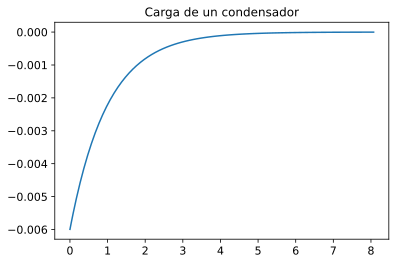

In [108]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Una etiqueta")

> **Pregunta: Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne `V2`. ¿Por qué son *opuestas*? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). Algo de ayuda [aquí](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.set_matplotlib_formats). ¿Qué valores devuelve el análisis de tipo `.op`? Justifícalo.**

Primero vamos a volver a desarollar la gráfica etiquetando los ejes:

<Figure size 432x288 with 0 Axes>

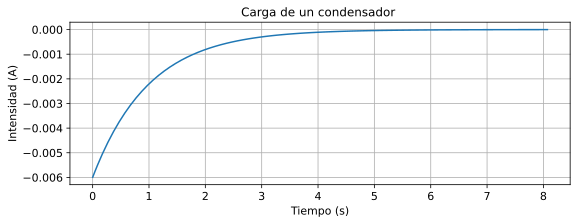

In [109]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

fig = plt.figure()
plt.figure(figsize=(9,3))
xlabel('Tiempo (s)')
ylabel('Intensidad (A)') 
plt.title("Carga de un condensador ")
plt.plot(resultados['tran']['T'], resultados['tran']
         ['I(V1)'], label="Una etiqueta")
plt.grid()

Lo primero que tenemos que saber es que un condensador es un componente eléctrico que almacena carga eléctrica en forma de diferencia de potencial para liberarla posteriormente.

Como podemos observar en la gráfica la intensidad de corriente es de 0.006A cuando t=0. Esto significa que el condensador está descargado. 

Cuando activamos la pila el condensador comienza a cargarse almacenando entre sus armaduras una diferencia de potencial opuesta a la de la pila. Cuando la diferencia de potencial del condensador es igual a la de la pila, la intensidad de corriente va disminuyendo y el condensador va adquiriendo su carga máxima.

La gráfica solo nos muestra la disminución de la intensidad frente al tiempo que tarda el condensador en cargarse.


Esta segunda gráfica contiene el voltaje en el borne V2.

¿Por qué son opuestas? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo?

<Figure size 432x288 with 0 Axes>

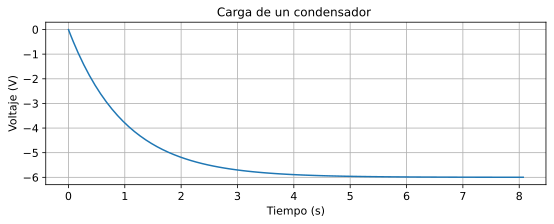

In [110]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

fig = plt.figure()
plt.figure(figsize=(9,3))
xlabel('Tiempo (s)')
ylabel('Voltaje (V)') 
plt.title("Carga de un condensador ")
plt.plot(resultados['tran']['T'], resultados['tran']
         ['V2'], label="Una etiqueta")
plt.grid()

## Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo: 

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

> **Pregunta:** Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea. [Aquí](https://matplotlib.org/gallery/api/two_scales.html) tienes un ejemplo de cómo se hace esto en Matplotlib. Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos). 

In [128]:
%%writefile "carrera en condensadores.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=9 uic=0
.end

Overwriting carrera en condensadores.ckt


In [129]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("carrera en condensadores.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación tran carrera condensadores.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)

Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00961538


<Figure size 432x288 with 0 Axes>

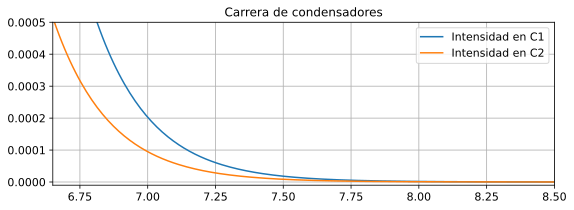

In [135]:
figura = plt.figure()
plt.figure(figsize=(9,3))
plt.title("Carrera de condensadores")
xlabel='Tiempo (s)'
xlabel='Corriente (A)'
plt.xlim(6.65, 8.5)
plt.ylim(-0.00001, 0.0005)
plt.grid()
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'],label="Intensidad en C1")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'],label="Intensidad en C2")
plt.legend()

**Ejercicio premium:** Repite la simulación con LTspice (invocándolo como comando externo, leyendo los datos de un fichero `.raw` y volviendo a graficar con Matplotlib. 

## Circuitos en corriente alterna

** Ejercicio:** Simula este circuito con LTspice y representa el voltaje y la intensidad en función del tiempo. Traduce este ejercicio a la versión Spice de Akhab y haz la misma representación. Ahkab utiliza otra sintaxis para expresar la corriente alterna. Esta está descrita en la [documentación](https://ahkab.readthedocs.io/en/latest/help/Netlist-Syntax.html#id24). 

In [136]:
%%writefile "corriente alterna.net"
* Circuito en corriente alterna
v1 1 0 sin(0 120 60 0 0)
r1 0 1 10k
.tran 1
.end

Overwriting corriente alterna.net


In [137]:
lts "corriente alterna.net"

In [138]:
%pycat corriente alterna.log

Circuit: * Circuito en corriente alterna

.OP point found by inspection.

Date: Tue Jan 05 23:53:39 2021
Total elapsed time: 0.028 seconds.

tnom = 27
temp = 27
method = modified trap
totiter = 4128
traniter = 4128
tranpoints = 2065
accept = 1532
rejected = 533
matrix size = 2
fillins = 0
solver = Normal
Matrix Compiler1: off  [0.0]/0.0/0.0
Matrix Compiler2: 96 bytes object code size  0.0/0.0/[0.0]

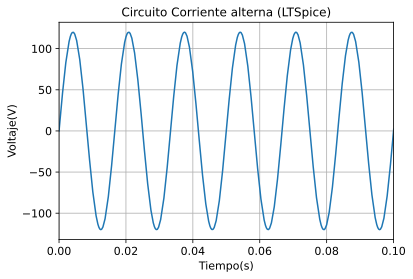

In [152]:
import ltspice
plt.title("Circuito Corriente alterna (LTSpice)")
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
xlim(0, 1/10)
plt.ylabel("Voltaje(V)")
plt.xlabel("Tiempo(s)")
time = l.get_time()
V1 = l.get_data("v(1)")
plt.grid()
plt.plot(time, V1)


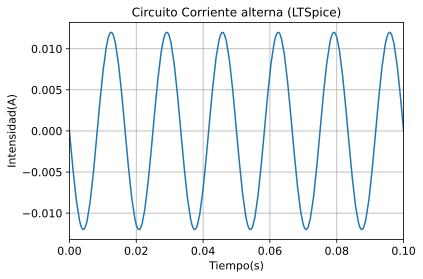

In [153]:
import ltspice
plt.title("Circuito Corriente alterna (LTSpice)")
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
xlim(0, 1/10)
plt.ylabel("Intensidad(A)")
plt.xlabel("Tiempo(s)")
time = l.get_time()
V1 = l.get_data("I(V1)")
plt.grid()
plt.plot(time, V1)

# Resumen de lo que se pide
Volved a realizar todos los ejercicios y demos en vuestro propio notebook, explicando con vuestras palabras cada paso, cada gráfica y respondiendo a cada pregunta. Cuidad la belleza, coherencia, narración, explicaciones y gráficas. Todas las gráficas se han pintado con Matplotlib, que es una biblioteca extendidísima en ciencia y tecnología. Es muuuuy bueno que la conozcáis. [Aquí](https://matplotlib.org/tutorials/introductory/pyplot.html) tenéis muchos ejemplos. 